# Assignment 2: Linear Regression

House Price Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [39]:
df = pd.read_csv('D:/TYITB69ML/house_price_prediction/data/Housing.csv')

In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [42]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [43]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

### Label Encoding

In [44]:
label_encoder_obj = LabelEncoder()

In [45]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [46]:
for column in categorical_columns:
    df[column] = label_encoder_obj.fit_transform(df[column])

In [47]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


### Scaling

In [48]:
std_scaler_obj = StandardScaler()

In [49]:
df['area'] = std_scaler_obj.fit_transform(df['area'].values.reshape(-1, 1))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,1767150,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,1750000,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,1750000,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int32  
 6   guestroom         545 non-null    int32  
 7   basement          545 non-null    int32  
 8   hotwaterheating   545 non-null    int32  
 9   airconditioning   545 non-null    int32  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int32  
 12  furnishingstatus  545 non-null    int32  
dtypes: float64(1), int32(7), int64(5)
memory usage: 40.6 KB


In [51]:
X = df.drop('price', axis=1)
y = df['price']

In [52]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [53]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Train-Test Splitting

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 12)
(381,)
(164, 12)
(164,)


## Linear Regression

In [56]:
lr_model = LinearRegression()

In [57]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = lr_model.predict(X_test)

In [59]:
r2_score(y_test, y_pred)

0.7235015223200352

In [60]:
lr_model.coef_

array([ 539560.99216258,  134994.4063419 ,  950583.38011996,
        418321.56918106,  466890.75142591,  368497.64386922,
        359364.42373495, 1246653.30876347,  897037.02562919,
        223301.80933099,  696754.52500579, -230222.65347948])

In [61]:
lr_model.intercept_

1388886.2352987705

## Ridge Regression

In [62]:
ridge_model = Ridge(alpha=0.01, random_state=0)

In [63]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01, random_state=0)

In [64]:
y_pred_ridge = ridge_model.predict(X_test)

In [65]:
mean_squared_error(y_test, y_pred_ridge)

959006311108.3346

In [66]:
r2_score(y_test, y_pred_ridge)

0.7235316677421264

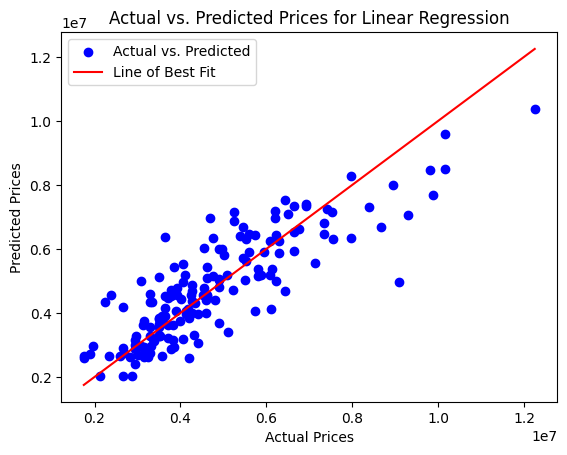

In [67]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Line of Best Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices for Linear Regression')
plt.legend()
plt.show()

# Simple Linear Regression

In [68]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,1767150,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,1750000,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,1750000,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [72]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


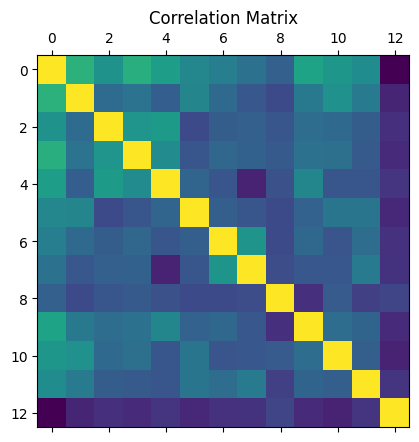

In [70]:
plt.matshow(df.corr())
plt.title('Correlation Matrix')
plt.show()

In [73]:
X = df['furnishingstatus']
y = df['price']

In [74]:
X

0      0
1      0
2      1
3      0
4      0
      ..
540    2
541    1
542    2
543    0
544    2
Name: furnishingstatus, Length: 545, dtype: int32

In [75]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381,)
(381,)
(164,)
(164,)


In [83]:
lr_model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [87]:
y_pred = lr_model.predict(X_test.values.reshape(-1,1))

In [88]:
r2_score(y_test.values.reshape(-1, 1), y_pred)

0.05454446278262226

# PCA

In [2]:
df = pd.read_csv('D:/TYITB69ML/house_price_prediction/data/Housing.csv')

In [6]:
features = df.iloc[:, 1:]
features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
label_encoder_obj = LabelEncoder()

In [10]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [13]:
for column in categorical_columns:
    features[column] = label_encoder_obj.fit_transform(features[column])

In [14]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [15]:
features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [16]:
pca = PCA()
pca_result = pca.fit_transform(features_standardized)

In [17]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.20622765, 0.1278482 , 0.10650708, 0.09434955, 0.07455508,
       0.07314426, 0.06737316, 0.0615989 , 0.05378615, 0.05224405,
       0.04777492, 0.03459102])

In [19]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(features_standardized)

In [21]:
pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i}" for i in range(1, 5 + 1)])


In [22]:
final_df = pd.concat([df['price'], pca_df], axis=1)


In [23]:
print(final_df)

        price       PC1       PC2       PC3       PC4       PC5
0    13300000  3.502187 -1.149565 -0.980418 -0.358522 -0.072628
1    12250000  5.327028 -3.431957 -0.633692  0.840387  1.384319
2    12250000  2.412915  1.175899 -0.699081  0.733346 -0.746674
3    12215000  3.891656  0.501179 -0.492877  0.418402  0.737940
4    11410000  2.823229  1.073978  0.573111  0.027026  1.753143
..        ...       ...       ...       ...       ...       ...
540   1820000 -1.328865  1.399804 -0.404609  0.578500  0.375160
541   1767150 -2.437307 -0.738551  1.096386  0.019161  1.011507
542   1750000 -2.312921  0.298189 -0.651742 -0.329040 -0.514415
543   1750000 -1.978672 -0.591292  0.926329  0.222193  1.625996
544   1750000 -1.452122 -0.738875 -0.220206 -0.427864 -0.964562

[545 rows x 6 columns]


In [24]:
X = df.drop('price', axis=1)
y = df['price']

In [25]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [26]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 12)
(381,)
(164, 12)
(164,)


In [29]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr_model.predict(X_test)

In [32]:
r2_score(y_test, y_pred)

0.723501522320035

In [33]:
lr_model.coef_

array([ 2.48857876e+02,  1.34994406e+05,  9.50583380e+05,  4.18321569e+05,
        4.66890751e+05,  3.68497644e+05,  3.59364424e+05,  1.24665331e+06,
        8.97037026e+05,  2.23301809e+05,  6.96754525e+05, -2.30222653e+05])

In [34]:
lr_model.intercept_

107133.47334964667